<a href="https://colab.research.google.com/github/sethkipsangmutuba/Exploratory-Data-Analysis/blob/main/EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/esaruhann/DS4SDGs/blob/Data_Manupilation/02-DS4SDGS-Exploratory%20Data%20Analysis_v0.3.1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 5. Outlier Detection and Treatment



An outlier is a data point that significantly deviates from the rest of the dataset. These anomalies can cause the distribution to become highly skewed, potentially leading to inaccurate results in later stages of analysis, such as Machine Learning. Identifying and addressing outliers is, therefore, a crucial step in the data exploration process.

**What cause an outlier?**

Outliers can typically indicate one of two scenarios:

1. Measurement Errors
- Caused by issues such as typos or malfunctions in measurement tools.
- These outliers should be carefully evaluated and, if confirmed as errors, removed from the dataset.

<br>

2. Skewed or Heavy-Tailed Distributions
- Resulting from non-normal distributions, such as exponential, geometric, Poisson, or bimodal distributions.
- In these cases, outliers may reflect the true nature of the data rather than errors.

When dealing with normally distributed data, the focus is primarily on identifying and cleaning measurement errors.

<br>

**How to detect an outlier?**

- While data visualization is a useful starting point for spotting potential outliers, mathematical methods are necessary to confirm whether a data point is truly an outlier.

1. Z-Score Method

- A data point is considered an outlier if its Z-score exceeds 3, meaning its distance from the mean is greater than three times the standard deviation.
- Formula:
<br><center>$Z score = (X - {\mu}) / {\sigma}$

  Where: X: Observed value, μ: Mean, σ:Standard deviation

<br>

2. Interquartile Range (IQR) Method

- Outliers are detected using the range between the first quartile (Q1) and the third quartile (Q3).
- Lower bound: $ Q1 - 1.5 * IQR$
- Upper bound: $ Q3 - 1.5 * IQR$
- This method is similar to the Z-score approach, as 1.5 * IQR roughly corresponds to three standard deviations.

<br>

3. Advanced Methods
For more complex datasets, advanced techniques like the [Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html) or the [Minimum Covariance Determinant (MCD)](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.MinCovDet.html) can be used to identify outliers more robustly.



### 5.1. Normal (Gaussian) Distribution

The [normal distribution](https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Investopedia%20%2F%20Lara%20Antal-,What%20Is%20a%20Normal%20Distribution%3F,as%20a%20%22bell%20curve%22) is a symmetric probability distribution where most observations cluster around the mean, forming a characteristic peak at the center.
<br>
<br> Values closer to the mean are more likely to occur compared to those farther away.

Example: In a class where the mean score is 60 and the standard deviation is 20, most students' scores would fall near 60.

<br>

The normal curve, commonly referred to as the bell curve, represents the graph of the probability density function of the normal distribution. This curve shows the probabilities of various outcomes in a continuous dataset.It has two parameters:
1.	Mean (μ): Represents the center of the curve, can be any real number.
2.	Standard Deviation (σ): Indicates the spread of data around the mean, must be greater than 0.

The shape of the curve is determined by these two parameters: the mean defines the location of the peak, and the standard deviation controls the width of the curve.

This distribution is widely used in statistics and data analysis because many natural and social phenomena tend to follow a normal distribution.

<p align="center">
  <img src="https://miro.medium.com/max/640/1*aDfLhLY1zMVcK4Ax8nTROg.png" />
</p>

**Figure 4: [A normal curve](https://ml-notes.akkefa.com/en/latest/probability/continuous_distributions.html)**
<br> -  Approximately 68.2% of all data points fall within the range of -1 to 1 standard deviation.
<br> -  About 95.5% of all data points are found within the range of -2 to 2 standard deviations.
<br> -  About 99.7% of all data points lie within the range of -3 to 3 standard deviations.


For more information on normal distribution, check out these link:
* [Normal Distribution Explained with Python Examples](https://vitalflux.com/normal-distribution-explained-python-examples/)

<br>


### **Why do we need normally distributed data ?**

The foundation of machine learning and data science lies in understanding probability distributions. Since many machine learning algorithms assume the data follows a normal distribution, it becomes crucial to provide them with data that is either normal or normalized. By understanding the distribution of values, we can calculate event probabilities, often using formulas. This, in turn, helps us gain deeper insights into the behavior of our target variables.

<br>

Check the links below for more in depth understanding of the importance of having a normally distributed dataset:
* [Ever Wondered Why Normal Distribution Is So Important?](https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3)

* [Modelling the probability distributions of dice](https://towardsdatascience.com/modelling-the-probability-distributions-of-dice-b6ecf87b24ea)

<p align="center">
  <img src="https://miro.medium.com/max/1400/1*q_v7LYQXg-qQtroBbuBunA.gif"width="400" />
</p>

**Figure 5: The best fittings for scenarios of dice from 1 to 15. (Blue histogram data are the simulation results, the red line is the Gaussian fitting.) [Image source](https://towardsdatascience.com/modelling-the-probability-distributions-of-dice-b6ecf87b24ea).**

**How to test for normality?**

1. **Histograms**: A normal distribution should appear as a bell-shaped curve.
2. **QQ Plot**: This plot is more effective than a histogram or box plot for detecting deviations from normality. If the data follows a normal distribution, it will align closely with the reference line, rather than forming a curve.
3. **Kolmogorov & Smirnov test**: Use this test when other techniques are inconclusive.
- If the observed data perfectly fits a normal distribution, the KS statistic will be 0.
- The test relies on the P-value to determine if the null hypothesis (that the data is normally distributed) should be rejected:
  - P-value > 0.05: Assume the data follows a normal distribution.
  - P-value ≤ 0.05: Reject the assumption of normality.
4. **Shapiro & Wilk**: Specifically designed to test for normality, unlike the KS test, which can test against other distributions.

- If the P-value of the Shapiro-Wilk Test is:
  - P-value > 0.05: Assume the data follows a normal distribution.
  - P-value ≤ 0.05: Reject the assumption of normality.
- The test provides a W statistic and a P-value.
- Note: For sample sizes larger than 5000, the W statistic remains accurate, but the P-value may not be reliable.





The code below demonstrates how to plot multiple normal distribution curves with varying means and standard deviations. To generate and visualize normal distributions, we can use either **numpy.random.normal** or **import norm from scipy.stats.**

Note: If you're unfamiliar with the code used for generating visualizations with Matplotlib or other libraries, don't worry. In the next section, you'll learn how to use this library to visualize your dataset effectively.



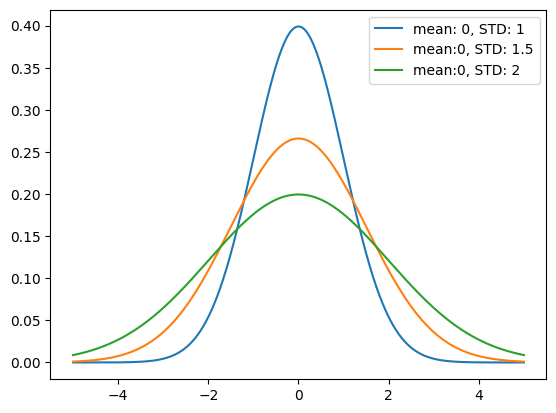

In [ ]:
#Plotting normal data with different standard deviations
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='mean: 0, STD: 1')
plt.plot(x, norm.pdf(x, 0, 1.5), label='mean:0, STD: 1.5')
plt.plot(x, norm.pdf(x, 0, 2), label='mean:0, STD: 2')

#add legend to plot
plt.legend()


probability to fall between -1 and 1 : 0.682689492137086


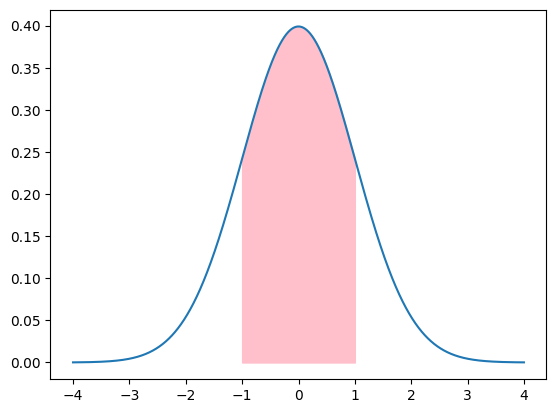

In [ ]:
from scipy.stats import norm
import scipy.integrate as integrate

mean = 0
distribution_function = lambda x: norm.pdf(x, mean)
x1 = -1
x2 = 1

print('probability to fall between {0} and {1} :'.format(x1, x2), integrate.quad(distribution_function, x1, x2)[0])
step = 0.001
whole_x = np.arange(-4, 4, step)
whole_y = distribution_function(whole_x)

needed_x = np.arange(x1, x2, step)
needed_y = distribution_function(needed_x)
plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y, color='pink')
plt.show()

#probability to fall between -1 and 1 : 0.682689492137086
#meaning there is a 68.2% chance that the value of the variable
#will be within -1 and 1 . (-1, 1 standard deviations, first)


For more information on CIs (Confidence Intervals) : https://www.youtube.com/watch?v=w3tM-PMThXk

In [ ]:
# Kolmogorov & Smirnov
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)


0.01604895152515423 0.9552686371663524


In [ ]:
# Shapiro & Wilk
from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(x)
shapiro_test
shapiro_test.statistic
0.9813305735588074
shapiro_test.pvalue
0.16855233907699585


0.16855233907699585

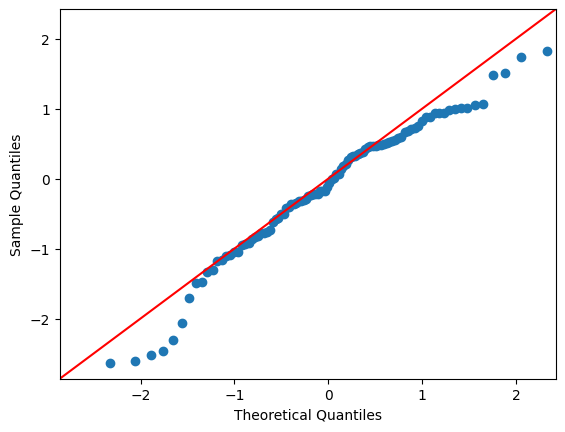

In [ ]:
# QQ Plot
import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=100)
sm.qqplot(my_data, line='45')
pylab.show()

Lambda value used for Transformation: 0.29290515780444243


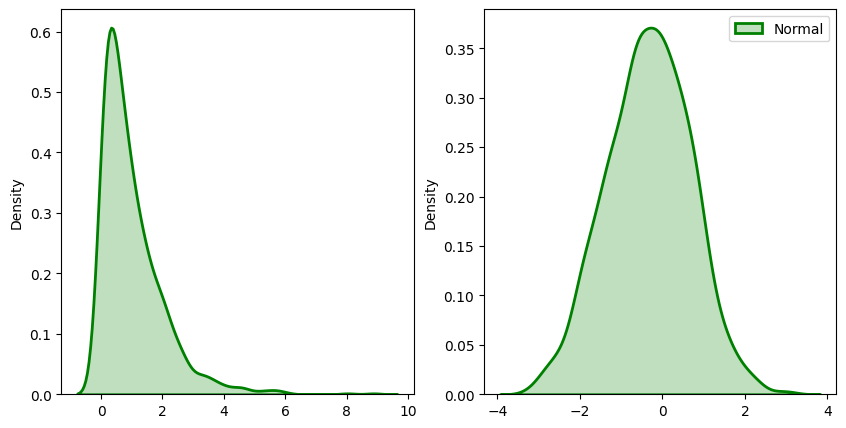

In [ ]:
# Box-cox Transformation of non-normal data to normal data

import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate non-normal data (exponential)
original_data = np.random.exponential(size=1000)

# Transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)

# Creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# Plotting the original data (non-normal) and fitted data (normal)
sns.kdeplot(original_data, fill=True, linewidth=2, label="Non-Normal", color="green", ax=ax[0])
sns.kdeplot(fitted_data, fill=True, linewidth=2, label="Normal", color="green", ax=ax[1])

# Adding legends to the subplots
plt.legend(loc="upper right")

# Rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")



**What are the consequences of outliers?**

Outliers can have a significant negative impact on data-centric projects for the following reasons:

1. Skewed Distribution: Outliers distort the data distribution, affecting statistical and analytical tools, which can lead to incorrect interpretations or inaccurate results.

2. Impact on Machine Learning Models: Training a machine learning model on a dataset with outliers is detrimental. Since machine learning models aim to generalize patterns, regression models may incorporate extreme outliers, resulting in a poorer fit and reduced predictive performance.

For these reasons, it is crucial to assess the data distribution and identify outliers by analyzing, visualizing, and testing the dataset.


